In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
cd /home/mabitbol/GBT-S140/analysis/

/home/mabitbol/GBT-S140/analysis


In [3]:
import foregrounds as fg
from scipy.optimize import curve_fit
import emcee
import corner
import smthphoto as sph

In [13]:
from __future__ import unicode_literals

figsize(8, 6)
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True
    
rcParams['xtick.labelsize'] = 20
rcParams['xtick.major.size'] = 10
rcParams['xtick.major.width'] = 1
rcParams['xtick.major.pad'] = 10
rcParams['xtick.minor.size'] = 5
rcParams['xtick.minor.width'] = 1

rcParams['ytick.labelsize'] = 20
rcParams['ytick.major.size'] = 10
rcParams['ytick.major.width'] = 1
rcParams['ytick.major.pad'] = 10
rcParams['ytick.minor.size'] = 5
rcParams['ytick.minor.width'] = 1

rcParams['legend.fontsize'] = 24
rcParams['legend.borderaxespad'] = 1

rcParams['axes.labelsize'] = 24
rcParams['axes.titlesize'] = 24

In [7]:
fdg = np.loadtxt('/home/mabitbol/GBT-S140/externaldata/fd_G107.20+05.20.dat')

In [8]:
cfs = fdg[:, 0] * 1.e9
mask = cfs < 4.e12
cfs = cfs[mask]
cjys = fdg[:, 1][mask]
cerrs = fdg[:, 2][mask]
cfit = fdg[:, 3][mask]
crem = fdg[:, 4][mask]
cremerr = fdg[:, 5][mask]

In [9]:
nfreqs = np.array([4.575, 5.625, 6.125]) * 1.e9
newdata = np.array([ 17.05, 17.66, 19.5])
nerrs = newdata * 0.1

In [10]:
freqs = []
fluxs = []
errors = []
for k, pf in enumerate(sph.planckfiles):
    nu = sph.planckfreqs[k]
    pflux, perr = sph.planck_calc(pf, nu, inside=80, outside=100)
    freqs.append(nu)
    fluxs.append(pflux)
    errors.append(perr)
for k, pf in enumerate(sph.wmapfiles):
    nu = sph.wmapfreqs[k]
    pflux, perr = sph.wmap_calc(pf, nu, inside=80, outside=100)
    freqs.append(nu)
    fluxs.append(pflux)
    errors.append(perr)
for k, pf in enumerate(sph.dirbefiles):
    nu = sph.dirbefreqs[k]
    pflux, perr = sph.dirbe_flux(pf, inside=80, outside=100)
    freqs.append(nu)
    fluxs.append(pflux)
    errors.append(perr)
for k, pf in enumerate(sph.irisfiles):
    nu = sph.irisfreqs[k]
    pflux, perr = sph.iris_flux(pf, inside=80, outside=100)
    freqs.append(nu)
    fluxs.append(pflux)
    errors.append(perr)
freqs = np.array(freqs)
fluxs = np.array(fluxs)
errors = np.array(errors)

In [11]:
mask1 = cfs > 1e10
mask2 = freqs < 3.1e12

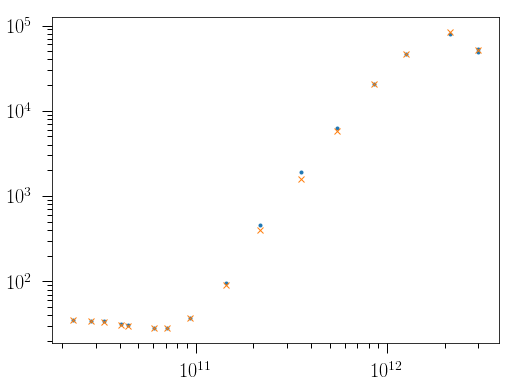

In [14]:
loglog(freqs[mask2], fluxs[mask2], '.')
loglog(cfs[mask1], cjys[mask1], 'x')

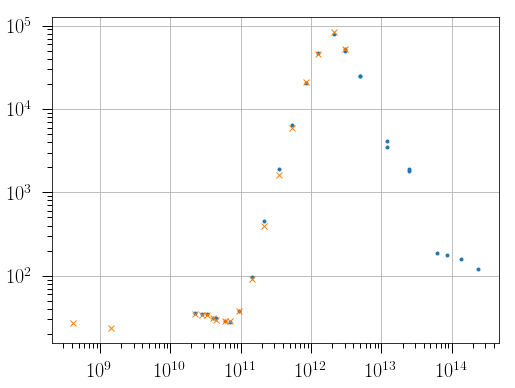

In [30]:
loglog(freqs, fluxs, '.')
loglog(cfs, cjys, 'x')
grid()